# TP 5 & 6 Systèmes non linéaires
## Exercice 1 : Vitesse de convergence
### Question 2

In [25]:
import math
import scipy.linalg
import scipy.stats as spi
import matplotlib.pyplot as plt
import numpy as np


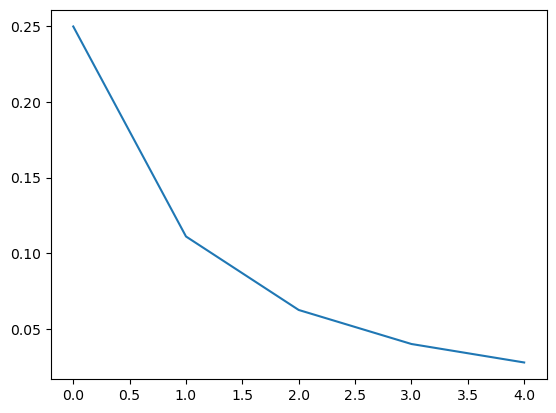

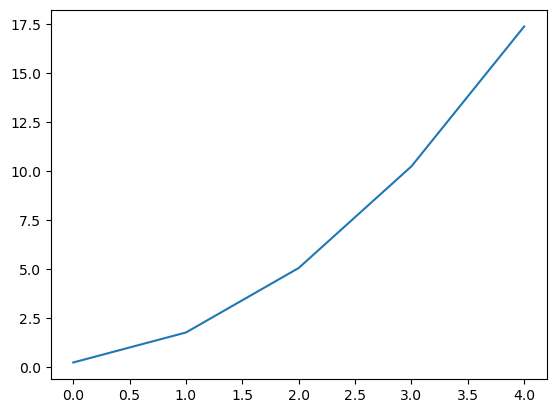

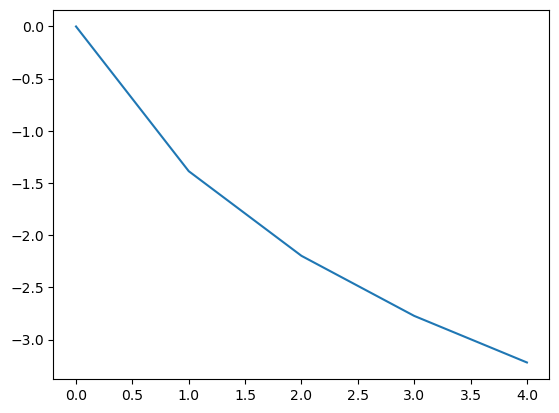

In [22]:
#Calcul les k premiers termes de la suite 
def x1(k):
    x = np.zeros(k)
    for i in range(k):
        x[i] = 1/ (i+1)**2
    return x #un tableau de taille k

def x2(k):
    x = np.zeros(k)
    for i in range(k):
        x[i] = (1 / 2)**i    
    return x

def x3(k):
    x = np.zeros(k)
    x[0] = 1/2
    for i in range (k-1):
        x[i+1] = x[i]**2
    return x
    



def dessine (z, k, p):
    x = z(k) #x de taille k # z est une fonction    
    y = x[1:]/x[:1]  #xk+1/xk
    kk = np.arange(k-1)
    plt.plot(kk,y)
    plt.show()
    if p != 1 :
        z = x[1:] / x[:-1]**p  #xk+1/xk**p  #z de taille k-1  0 ...k-2
        
        plt.plot(kk,z)
        plt.show()
    return kk,x,y,z
kk,x,y,z = dessine(x1, 6, 2)


def trace (z, k, p):
    x = z(k) #x de taille k    
    y = np.log(x[:k-1])  #ln(xk)
    l = np.log(x[1:])  #ln(xk+1)  
    kk = np.arange(k-1)
    plt.plot(kk,y)
    plt.show()
    return kk,x,l,z
kk, x, l, z = trace(x1, 6, 2)





# Système monodimensionnels

## Exercice 2 : Méthode de Newton pour les polynomes
### Question 1


In [31]:
def polynome(x,a,b,c):
    return x**3+c*x**2+b*x+a
    
def derive(x,a,b,c):
    return 3*x**2+2*c*x+b
    
def newton (a,b,c, x0, n_iter, tol):
    nit = 0
    res = np.zeros(n_iter_max)
    res[0] = abs(polynome(x0,a,b,c))
    x = x0
    while (nit < n_iter) and res[nit] > tol:
        nit += 1
        x = x - polynome(x,a,b,c)/derive(x,a,b,c)
        res[nit] = abs(polynome(x,a,b,c))
        
    return (x, nit, res[:nit+1])


## Systèmes multidimensionnels
### Exercice 4 : Newton pour un système 2 * 2

In [49]:
def newton(g, dg, x0, n_iter_max=100, tol=1e-7):
    """
    Implémente la méthode de Newton pour trouver les racines d'un système d'équations.

    Args :
        g : Une fonction représentant le système d'équations (prend deux arguments).
        dg : Une fonction représentant la dérivée (jacobienne) de g (prend deux arguments).
        x0 : une estimation initiale de la racine (un tuple ou un tableau numpy avec deux éléments).
        n_iter_max : nombre maximum d'itérations (par défaut 100).
        tol : tolérance de convergence (par défaut 1e-7).

    Retour:
        Un tuple contenant :
            - La solution (un tableau numpy représentant la racine).
            - Le nombre d'itérations effectuées.
            - Un tableau contenant la norme de la fonction à chaque itération.
    """
    n_iter = 0
    res = np.zeros(n_iter_max)
    res[0] = np.linalg.norm(g(x0[0], x0[1]))
    x = np.array(x0, dtype=float)
    while (n_iter < n_iter_max) and (res[n_iter] > tol):
        n_iter += 1
        x = x - np.dot(np.linalg.inv(dg(x[0], x[1])), g(x[0], x[1]))
        res[n_iter] = np.linalg.norm(g(x[0], x[1]))
        
    return (x, n_iter, res)


# Définition de la fonction de g
def g(x, y):
    X = np.power(x,4) + 2*np.power(x,3),y - 15*np.power(x,2) + np.power(x,2)*np.power(y,2) + 2*x*y + np.power(y,2)
    Y = np.power(y,4) + np.multiply(2,x,np.power(y,3))-  np.multiply(8,np.power(y,2)) + np.power(x,2)*np.power(y,2) + 2*x*y + np.power(y,2)
    return np.array([X, Y])

# Définition des dérivées partielles de g
def dg(x, y):
    A1 = 4*np.power(x,3) + np.multiply(6, np.power(x, 2), y) - 30*x + 2*x*np.power(y,2) + 2*y
    A2 = np.multiply(2,np.power(x,3)) + np.multiply(2,np.power(x,2),y) + np.multiply(2,x) + np.multiply(2,y)
    B1 = np.multiply(2,np.power(y,3)) + np.multiply(2,x,np.power(y,2)) + np.multiply(2,y) + np.multiply(2,x)
    B2 = np.multiply(4,np.power(y,3)) + np.multiply(6,x,np.power(y,2)) - np.multiply(16,y) + np.multiply(2,y,np.power(x,2)) + np.multiply(2,x)
    return np.array([
        [A1, A2],
        [B1, B2]
    ])
        
# Calcul de la solution du système
x0 = (1, 1)    
dg_inv = np.linalg.inv(dg(*x0))
Solution = newton(g, dg, x0)
print(Solution)
    
# Affichage du nombre d'itérations
print("Nombre d'itérations :", Solution[1])


TypeError: return arrays must be of ArrayType

### Exercice 5 : Pendule non-linéaire